In [227]:
# Here it seems that although our initial guess vectors are constructed the same way as before, by ensuring that each is orthogonal to the converged eigenvectors before it, the RQ iteration fails to converge to all eigenvalue/eigenvector pairs.


In [2]:
# Thomas Glucksman
# AMATH 584, Homework 5
# Due 12/7/20

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.linalg as sp

In [2]:
## 1. Eigenvalues and Power Iterations

# (a) Generate a random, symmetric matrix A which is m by m where m = 10. Use the EIGS command in MATLAB (or the equivalent in Python) to give you the ground truth eigenvalues and eigenvectors.


In [3]:
# Generate random symmetric matrix A
m = 10
R = np.random.rand(m,m)
A = R + R.conj().T

In [4]:
# Extract ground truth eigenvalues and eigenvectors
w,v = np.linalg.eig(A)

In [5]:
# (b) Find the largest eigenvalue with the power iteration method. Compare the accuracy of the method as a function of iterations

In [6]:
# implement power iteration method
# A matrix, k iterations
def powerIterate(A, k):
    m = A.shape[0]
    
    # set initial guess vector
    v0 = np.random.rand(m)
    
    # normalize
    v0 = v0/np.linalg.norm(v0)
    v = v0
    # iterate
    for i in np.arange(k):
        w = np.dot(A, v) # w = Av
        v_k = w/np.linalg.norm(w) # normalize w
         
        v = v_k

    # Rayleigh quotient
    lam_k = np.dot(v_k, np.dot(A, v_k))

    return lam_k, v_k

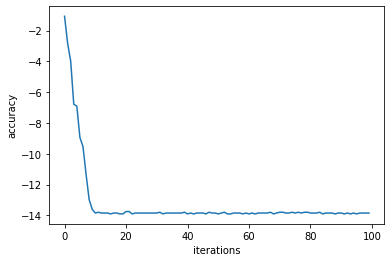

In [7]:
# Compare results of iterations to actual max eigenvalue
max_eval = np.amax(w)
res = []
for i in np.arange(100):
    power_eval, power_evec = powerIterate(A, i+1)
    accuracy = np.absolute(max_eval - power_eval)
    res.append(accuracy)

fig = plt
plt.plot(np.log10(res))
plt.ylabel("accuracy");
plt.xlabel("iterations");

In [186]:
# Steep increase in accuracy from 1 to around 10 iterations, and stabilizes afterwards with accuracy between order magnitude 10^-12 to 10^-14 

In [187]:
# (c) Find all ten eigenvalues by Rayleigh Quotient iteration and guessing initial "eigenvectors". Compare the accuracy of the method as a function of iterations and discuss your initial guesses to find all eigenvalue/eigenvector pairs.

In [3]:
# implement Rayleigh Quotient iteration
# A matrix
# k iterations
# v0 initial guess vector, assume A mxm and v0 mx1
def rqIterate(A, v0, k):
    m = A.shape[0]
    I = np.eye(m)

    # normalize v0
    v0 = v0/np.linalg.norm(v0)

    # compute lambda_0
    lam_0 = np.vdot(v0, np.dot(A, v0))

    v = v0
    lam = lam_0
    for i in np.arange(k):
        try:
            w0 = sp.solve(A-(lam*I),v)
        except:
            #print("Solution converged")
            break
        v_k = w0/np.linalg.norm(w0)
        lam_k = np.vdot(v_k, np.dot(A, v_k))
        lam = lam_k
        v = v_k 

    return lam, v

In [9]:
# Our method for choosing initial guess vectors will be to construct them iteratively
#    1) Generate random vector and normalize
#    2) Do RQ on random vector and converge to an eigenvector
#    3) Generate another random vector, and normalize
#    4) Subtract component of all previous eigenvectors from it
#    5) Repeat steps 2-4
v_guess = [] # array storing converged eigenvectors
v_guess0 = [] # array storing initial guesses for eigenvectors

v0 = np.random.rand(m)
v0 = v0/np.linalg.norm(v0)
v_guess0.append(v0)
lam_k, v_k = rqIterate(A,v0,10)

v_guess.append(v_k)

for i in range(1,m):
    v0 = np.random.rand(m)
    for j in range(0,i):
         x = v_guess[j]/np.linalg.norm(v_guess[j])
         v0 = v0-np.dot(x,np.dot(v0,x))
    
    v_guess0.append(v0)
    lam_k, v_k = rqIterate(A,v0,10)
    v_guess.append(v_k)

    

In [11]:
# Run RQ iteration on each initial guess vector
# store results in lam_result
lam_result = []
for i in np.arange(m):
    lam_result.append(rqIterate(A, v_guess0[i], 100)[0])

lam_result, len(np.unique(lam_result))

([9.52607202979681,
  -0.4145448737536431,
  -0.6976993322041544,
  -1.0718240764874551,
  -1.7555323557593372,
  0.9957807127054863,
  0.574700892951852,
  1.3891536303590246,
  -1.8383348316451185,
  1.9295032597082569],
 10)

In [12]:
# Check that they do match the actual eigenvalues
np.sort(w) - np.sort(lam_result)

array([-2.22044605e-15, -2.22044605e-15, -6.66133815e-16,  5.55111512e-16,
       -2.22044605e-16,  2.22044605e-16, -4.44089210e-16,  0.00000000e+00,
        3.33066907e-15,  1.42108547e-14])

In [13]:
w

array([ 9.52607203,  1.92950326,  1.38915363,  0.99578071,  0.57470089,
       -1.83833483, -1.75553236, -0.41454487, -0.69769933, -1.07182408])

Text(0.5, 0, 'iterations')

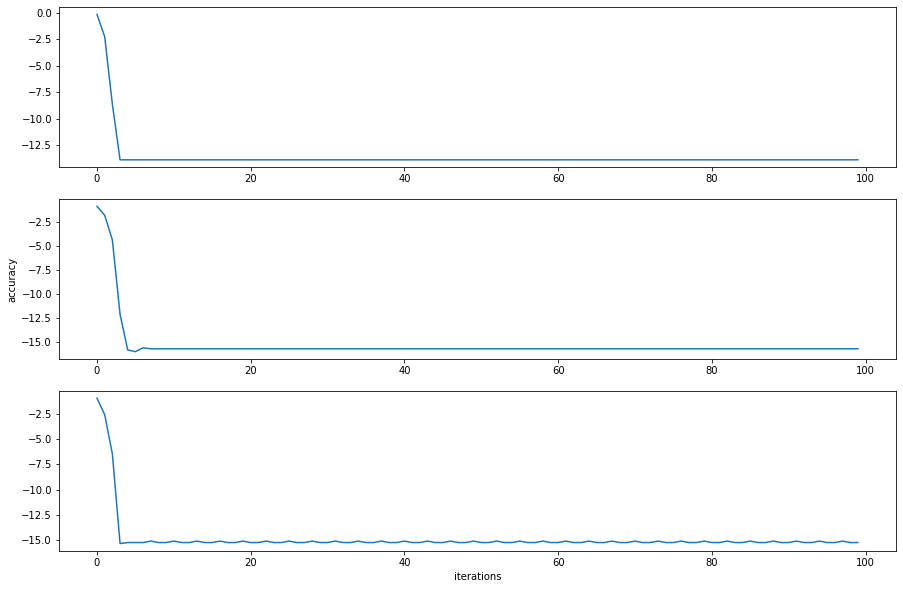

In [19]:
# Compare accuracy as a function of iterations
# Do with first three eigenvector guesses

eval1, eval2, eval3 = w[0], w[7], w[8]
res1, res2, res3 = [], [], []

for i in np.arange(100):
    rq_eval1, rq_evec1 = rqIterate(A, v_guess0[0], i+1)
    rq_eval2, rq_evec2 = rqIterate(A, v_guess0[1], i+1)
    rq_eval3, rq_evec3 = rqIterate(A, v_guess0[2], i+1)
    accuracy1 = np.absolute(eval1 - rq_eval1)
    accuracy2 = np.absolute(eval2 - rq_eval2)
    accuracy3 = np.absolute(eval3 - rq_eval3)
    
    res1.append(accuracy1)
    res2.append(accuracy2)
    res3.append(accuracy3)

fig, axs = plt.subplots(3,1, figsize = (15,10))
axs[0].plot(np.log10(res1))
axs[1].plot(np.log10(res2))
axs[1].set_ylabel("accuracy")
axs[2].plot(np.log10(res3))
axs[2].set_xlabel("iterations")

In [ ]:
# Rayleigh Quotient iterations converges much faster than the power iteration scheme, reaching accuracy within order 10^-15 within 10 iterations or less. 

In [ ]:
# (d) Repeat b and c with a random matrix that is not symmetric. Be sure to plot the eigenvalue in the complex plane.

In [4]:
# Generate a random matrix A
m = 10
A = np.random.rand(m,m)

In [5]:
# Extract ground truth eigenvectors and eigenvalues
w,v = sp.eig(A)

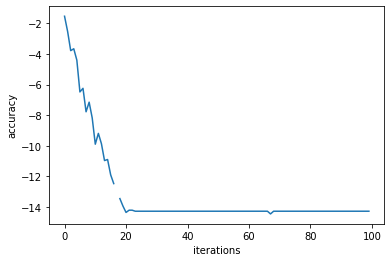

In [22]:
# (b) Find largest eigenvalue with the power iteration method. Compare the accuracy of the method as a function iterations. 

max_eval = np.amax(w)
res = []
for i in np.arange(100):
    power_eval, power_evec = powerIterate(A, i+1)
    accuracy = np.absolute(max_eval - power_eval)
    res.append(accuracy)

plt.plot(np.log10(res))
plt.ylabel("accuracy");
plt.xlabel("iterations");

In [47]:
# Here the power iteration takes roughly 18-20 iterations to converge within order 10^-14 magnitude of accuracy, which is slightly more compared to the symmetric case. But overall the difference in convergence speed seems negligible here.

In [ ]:
# (c) Find all ten eigenvalues by Rayleigh Quotient iteration and guessing initial "eigenvectors". Compare the accuracy of the method as a function of iterations and discuss your initial guesses to find all eigenvalue/eigenvector pairs.

In [226]:
v_guess = [] # array storing converged eigenvectors
v_guess0 = [] # array storing initial guesses for eigenvectors

v0 = np.random.random(10) + np.random.random(10) * 1j
v0 = v0/np.linalg.norm(v0)
v_guess0.append(v0)
lam_k, v_k = rqIterate(A,v0,10)

v_guess.append(v_k)

for i in range(1,m):
    v0 = np.random.random(10) + np.random.random(10) * 1j
    for j in range(0,i):
         x = v_guess[j]/np.linalg.norm(v_guess[j])
         v0 = v0-np.dot(x,np.vdot(v0,x))
         #v0 = v0/np.linalg.norm(v0)
         #print(np.vdot(v0,x))
    
    v_guess0.append(v0)
    lam_k, v_k = rqIterate(A,v0,10)
    v_guess.append(v_k)

In [7]:
# Since the matrix A is non-symmetric, we will take a different approach in determining the initial guess eigenvectors. 
# Since the eigenvectors of A are not guaranteed to be real and orthogonal, we will randomly guess complex eigenvectors and iterate until we have converged to all 10 true eigenvectors.

v_guess = []
v_guess0 = []
lam_result = []
guess = 0
while len(lam_result) < 4:

    #noise = np.random.rand(10)*10**-np.random.randint(0,10)+ np.random.rand(10)*10**np.random.randint(0,10) * 1j
    #v0 = v[guess] + noise
    v0 = np.random.randint(0,10)*np.random.rand(10)*10**-np.random.randint(0,10)+ np.random.randint(0,10)*np.random.rand(10)*10**np.random.randint(0,10) * 1j
    v0 = v0/np.linalg.norm(v0)
    #v_guess0.append(v0)

    lam_k, v_k = rqIterate(A, v0, 50)
    print(lam_k, guess, np.isclose(lam_k, lam_result))

    if np.any(np.isclose(lam_k, w)):# and ~np.all(np.isclose(lam_k, lam_result)):
        if len(lam_result) == 0 or np.all(~np.isclose(lam_k, lam_result)):
            v_guess.append(v_k)
            lam_result.append(lam_k)
            guess += 1
            print(lam_result, guess)


lam_result


.572850193507302+0j) 2 [ True False]
(5.5728501935073+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.5728501935073+0j) 2 [ True False]
(5.572850193507301+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507301+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.5728501935073025+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.5728501935073+0j) 2 [ True False]
(5.5728501935073025+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(5.572850193507301+0j) 2 [ True False]
(5.572850193507301+0j) 2 [ True False]
(5.5728501935073+0j) 2 [ True False]
(5.5728501935073025+0j) 2 [ True False]
(5.5728501935073+0j) 2 [ True False]
(5.5728501935073025+0j) 2 [ True False]
(5.572850193507302+0j) 2 [ True False]
(nan+nanj) 2 [False False]
(5.5728501935073025+0j) 2 [ True False]
(5.57

In [ ]:
# In theory I believe this would find all the eigenvector/eigenvalue pairs over a long period of time, but I see no better way to compute these other than by randomly guessing.
# I also attempted to make each initial guess the ground truth eigenvectors with a noise factor added, but this approach was no better than just randomly guessing.

In [214]:
# Run RQ iteration on each initial guess vector
# store results in lam_result
lam_result = []
for i in np.arange(m):
    lam_result.append(rqIterate(A, v_guess0[i], 100)[0])

lam_result, len(np.unique(lam_result))

([(5.079085379875066+0j),
  (5.079085379875065+0j),
  (5.079085379875065+0j),
  (0.7104964135909391+0.49237222948917714j),
  (0.7104964135909388+0.49237222948917714j),
  (0.7104964135909388+0.49237222948917714j),
  (0.7104964135909388+0.49237222948917714j),
  (0.7104964135909386+0.492372229489177j),
  (0.7104964135909388+0.49237222948917714j),
  (5.079085379875066+0j)],
 5)

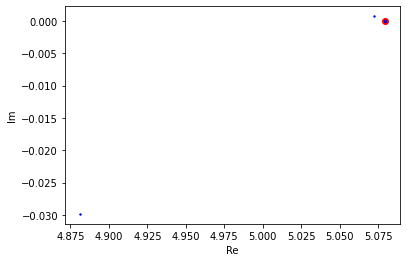

In [243]:
# Plotting convergence of discovered eigenvalue
res_real = []
res_imag = []
eval_real = w[0].real
eval_imag = w[0].imag
for i in np.arange(100):
    rq_eval = rqIterate(A, v_guess0[0], i+1)[0]
    rq_eval_real = rq_eval.real
    rq_eval_imag = rq_eval.imag
    res_real.append(rq_eval_real)
    res_imag.append(rq_eval_imag)

fig = plt.figure()
ax = fig.add_subplot(111)



ax.scatter(eval_real, eval_imag, color = "red")
ax.scatter(res_real, res_imag, color = "blue", s = 2)
ax.set_ylabel("Im");
ax.set_xlabel("Re");


In [ ]:
# Here the iterations are plotted in blue in the complex plane, and the actual eigenvalue is shown in red. Within 3 iterations of the initial guess, the eigenvalue already begins to converge.

In [ ]:
## 2. Back to Yale Faces:
# Download the data set for CROPPED IMAGES
# (a) Power iterate on the matrix of images to find the dominant eigenvector and eigenvalue. Compare it to the leading order SVD mode.

In [88]:
# Import cropped yalefaces data
imgdir_cr = "yalefaces\CroppedYale"

# Read in all cropped images and and reshape each into a column vector, then save as a matrix 

# initialize empty arrays
cvecs = []

# creating data matrix of all face images
for root, dirs, files in os.walk(imgdir_cr): 
    for file in files:
        img = plt.imread(os.path.join(root, file))
        m = img.shape[0]
        n = img.shape[1]
        c = np.reshape(img, [m*n,1])
        cvecs.append(c)

# save as matrix
A = np.mat(np.array(cvecs)).T # transpose so each image is a column vector, matrix is [m*n,(number of images)]

# Use first 1000 faces from dataset
A_train = np.mat(A[:,:1000])

In [89]:
# do SVD to get ground truth singular values
U, S, VT = np.linalg.svd(A_train, full_matrices = 0)

In [90]:
# In order to power iterate on the matrix of images, we will compute the square correlation matrix
C=np.cov(A_train.T)

In [253]:
# Do power iteration
#C = np.asarray(C)
m = C.shape[0]
v0 = np.random.rand(m)
powerIterate(C, 100)[0], S[0]

(1372324.2700632391, 477311.08658198535)

In [ ]:
# Power iteration estimate of dominant eigenvalue using square covariance matrix is not accurate

In [184]:
# (b) Use randomized sampling to reproduce the SVD matrices: U, S, VT

In [248]:
# Step A
m,n = A_train.shape

# Generate omega matrix n x k
k = 10
omega = np.random.rand(n,k)

# Sample column space of A using omega
Y = np.dot(A_train, omega)

# Do QR factorization of Y
Q,R = np.linalg.qr(Y, mode = "reduced")

In [249]:
# Step B

# Project A onto Q space
B = np.dot(Q.T, A_train)

# Do SVD on B
U_rand, S_rand, VT_rand = np.linalg.svd(B)

In [250]:
# (c) Compare the randomized modes to the true modes along with the singular value decay as a function of the number of randomized samples

# Define function for randomized sampling to produce SVD
# A matrix
# k samples
def randomizeSVD(A, k):
    m,n = A.shape

    # Generate omega matrix n x k
    omega = np.random.rand(n,k)

    # Sample column space of A using omega
    Y = np.dot(A, omega)

    # Do QR factorization of Y
    Q,R = np.linalg.qr(Y, mode = "reduced")

    # Project A onto Q space
    B = np.dot(Q.T, A)

    # Do SVD on B
    U_rand, S_rand, VT_rand = np.linalg.svd(B)

    return U_rand, S_rand, VT_rand

In [254]:

samples = np.array([10,100,200,500])
acc = []
evals = []
for i in np.arange(4):
    # Compute randomized modes
    S_rand = randomizeSVD(A_train, samples[i])[1]
    # Compare to true modes
    acc.append(np.absolute(S[0:samples[i]]-S_rand))
    evals.append(S_rand)


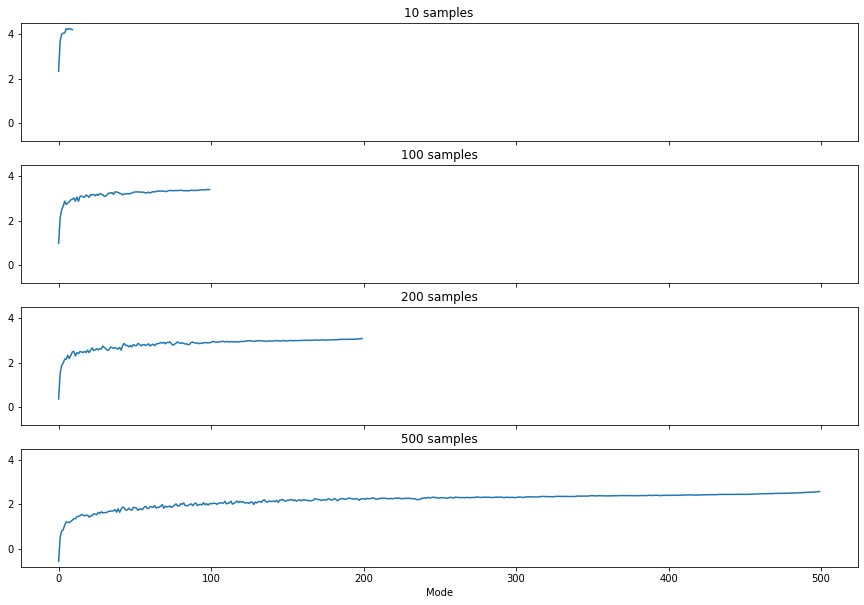

In [264]:
# Compare accuracy of randomized modes to true modes as a function of the number of randomized samples
fig, axs = plt.subplots(4,1, figsize = (15,10), sharey=True, sharex=True)
axs[0].plot(np.log10(acc[0]))
axs[0].set_title("10 samples")
axs[1].plot(np.log10(acc[1]))
axs[1].set_title("100 samples")
axs[2].plot(np.log10(acc[2]))
axs[2].set_title("200 samples")
axs[3].plot(np.log10(acc[3]))
axs[3].set_title("500 samples")
axs[3].set_xlabel("Mode");

In [245]:
# We see that as we increase the number of k samples, the dominant modes are estimated with a higher degree of accuracy (less than order 10^2), but this tapers off rather quickly. The estimates for the remaining modes generally lie between order magnitude 10^2 to 10^4 accurate. We can conclude that the randomized sampling method is feasible for estimating the dominant modes only. 

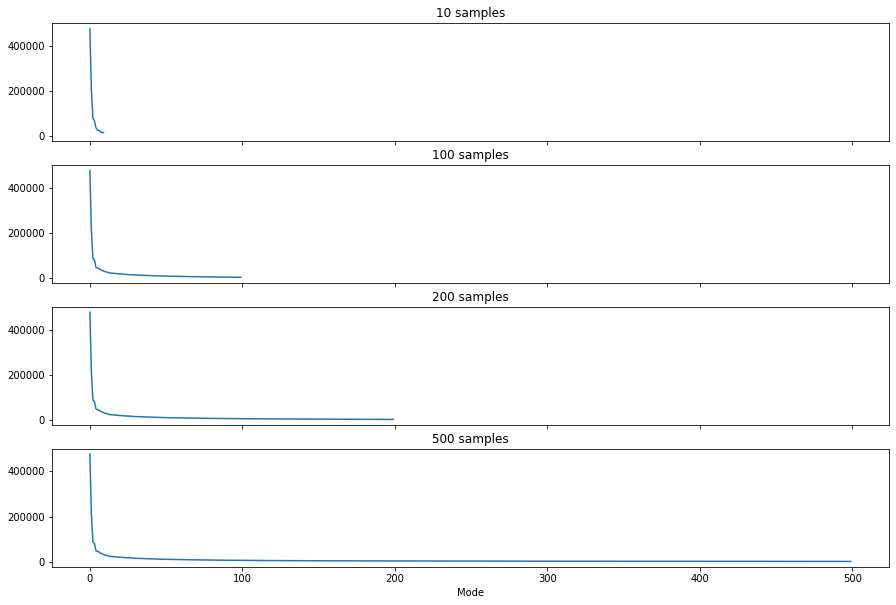

In [263]:
# Examine eigenvalue decay as a function of the number of randomized samples
fig, axs = plt.subplots(4,1, figsize = (15,10), sharey=True, sharex=True)
axs[0].plot(evals[0])
axs[0].set_title("10 samples")
axs[1].plot(evals[1])
axs[1].set_title("100 samples")
axs[2].plot(evals[2])
axs[2].set_title("200 samples")
axs[3].plot(evals[3])
axs[3].set_title("500 samples")
axs[3].set_xlabel("Mode");

In [ ]:
# Singular value decay rate seems unchanged based on number of random samples taken.